<a href="https://colab.research.google.com/github/Victor-Bury/Aula_Seg/blob/main/Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 1 – Exploração de Dados com Pandas







In [ ]:
import pandas as pd

# 1. Carregar os dados a partir da URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
dados = pd.read_csv(url)

# 2. Mostrar as 5 primeiras e 5 últimas linhas
print(dados.head())
print(dados.tail())

# 3. Mostrar número de linhas e colunas
print("Formato:", dados.shape)

# 4. Verificar valores nulos
print(dados.isnull().sum())

# 5. Estatísticas descritivas
print(dados.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

Exercício 2 – Seleção e Filtragem

In [ ]:
# 1. Apenas passageiros do sexo feminino
mulheres = dados[dados["Sex"] == "female"]

# 2. Passageiros com idade maior que 30
maiores_30 = dados[dados["Age"] > 30]

# 3. Criar coluna "idade_grupo"
def classificar_idade(idade):
    if pd.isnull(idade):
        return "desconhecido"
    elif idade < 12:
        return "criança"
    elif idade < 60:
        return "adulto"
    else:
        return "idoso"

dados["idade_grupo"] = dados["Age"].apply(classificar_idade)

# 4. Média de idade por sexo
print(dados.groupby("Sex")["Age"].mean())


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


Exercício 3 – Visualizações

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Gráfico de barras – sobreviventes por sexo
sns.countplot(data=dados, x="Sex", hue="Survived")
plt.title("Sobreviventes por Sexo")
plt.show()

# 2. Histograma das idades
sns.histplot(dados["Age"].dropna(), bins=20, kde=True)
plt.title("Distribuição das Idades")
plt.show()

# 3. Dispersão Idade x Tarifa
sns.scatterplot(data=dados, x="Age", y="Fare", hue="Sex")
plt.title("Idade x Tarifa por Sexo")
plt.show()

# 4. Heatmap da correlação
sns.heatmap(dados.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


Exercício 4 – Estatística Descritiva

In [ ]:
# 1. Média, mediana e desvio padrão da tarifa
print("Média:", dados["Fare"].mean())
print("Mediana:", dados["Fare"].median())
print("Desvio Padrão:", dados["Fare"].std())

# 2. Diferença na média da tarifa entre homens e mulheres
print(dados.groupby("Sex")["Fare"].mean())

# 3. Moda das idades
print("Moda das Idades:", dados["Age"].mode()[0])


Exercício 5 – Mini-Projeto


In [ ]:
# 1. Tratamento de valores nulos
dados["Age"].fillna(dados["Age"].median(), inplace=True)
dados["Embarked"].fillna(dados["Embarked"].mode()[0], inplace=True)

# 2. Visualizações
sns.barplot(x="Sex", y="Survived", data=dados)
plt.title("Taxa de Sobrevivência por Sexo")
plt.show()

sns.barplot(x="idade_grupo", y="Survived", data=dados)
plt.title("Taxa de Sobrevivência por Grupo de Idade")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=dados)
plt.title("Taxa de Sobrevivência por Classe")
plt.show()


Exercício Extra – Mercado Financeiro (PETR4)

/tmp/ipython-input-3776125874.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  historico = yf.download(acao, period="90d")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PETR4.SA']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Empty DataFrame
Columns: [(Adj Close, PETR4.SA), (Close, PETR4.SA), (High, PETR4.SA), (Low, PETR4.SA), (Open, PETR4.SA), (Volume, PETR4.SA)]
Index: []


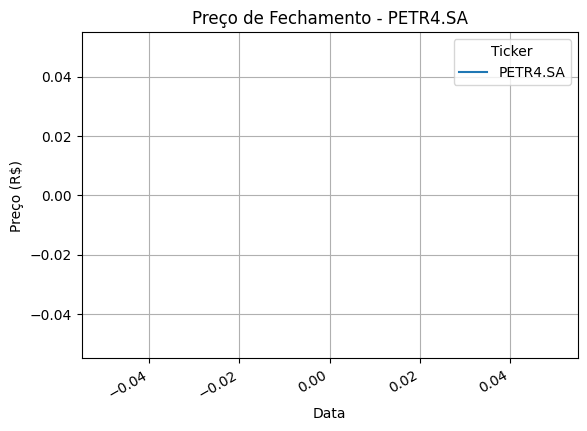

TypeError: unsupported format string passed to Series.__format__

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

acao = "PETR4.SA"
historico = yf.download(acao, period="90d")

print(historico.head())

# Gráfico de preços de fechamento
historico["Close"].plot(title=f"Preço de Fechamento - {acao}")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.show()

# Média do preço de fechamento
media = historico["Close"].mean()
print(f"Média do preço de fechamento nos últimos 90 dias: R$ {media:.2f}")

